In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train.SalePrice = np.log1p(train.SalePrice)
y_train = train.SalePrice
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop('SalePrice',axis=1)
trainrow=train.shape[0]
testrow=test.shape[0]
testids=test['Id'].copy()
X_train = data.iloc[:trainrow]
X_test = data.iloc[trainrow:]
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

In [16]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
train.shape
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [3]:
missing = data.isnull().sum().sort_values(ascending=False)
missing = missing.drop(missing[missing==0].index)
missing

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [4]:
#Missing data
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')
data['Alley'] = data['Alley'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['LotFrontage'] = data['LotFrontage'].fillna(train['LotFrontage'].dropna().mean())
data['GarageCond']=data['GarageCond'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageType']=data['GarageType'].fillna('NA')
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['MSZoning']=data['MSZoning'].fillna(train['MSZoning'].dropna().sort_values().index[0])
data['Utilities']=data['Utilities'].fillna(train['Utilities'].dropna().sort_values().index[0])
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['Functional']=data['Functional'].fillna(train['Functional'].dropna().sort_values().index[0])
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['Electrical']=data['Electrical'].fillna(train['Electrical'].dropna().sort_values().index[0])
data['Exterior1st']=data['Exterior1st'].fillna(train['Exterior1st'].dropna().sort_values().index[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(train['Exterior2nd'].dropna().sort_values().index[0])
data['SaleType']=data['SaleType'].fillna('Oth')
data['KitchenQual']=data['KitchenQual'].fillna(train['KitchenQual'].dropna().sort_values().index[0])
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)

In [5]:
train.drop_duplicates(subset=['Id'], keep='first')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


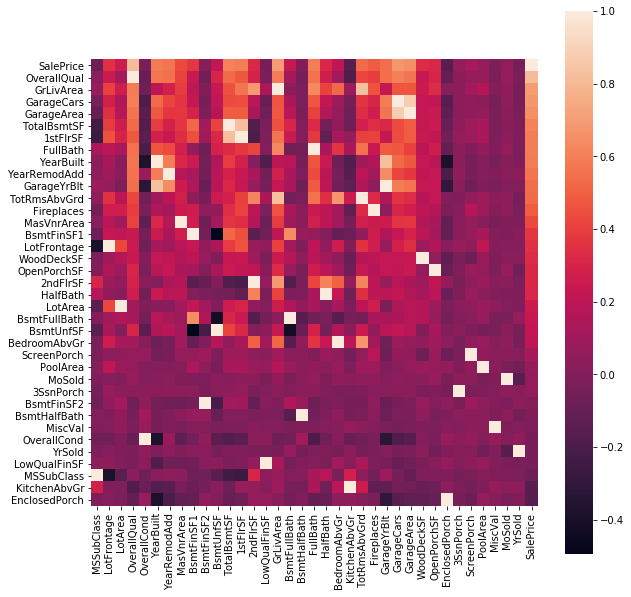

In [29]:
plt.subplots(figsize=(10, 10))
corr = train.drop('Id', axis=1).corr().sort_values(by='SalePrice', ascending=False)
sns.heatmap(corr, square=True)

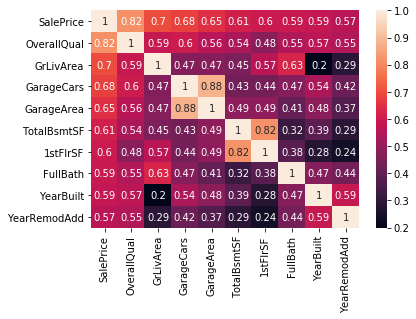

In [30]:
cols =corr['SalePrice'].head(10).index
sns.heatmap(np.corrcoef(train[cols].values.T), annot=True, yticklabels=cols.values, xticklabels=cols.values)

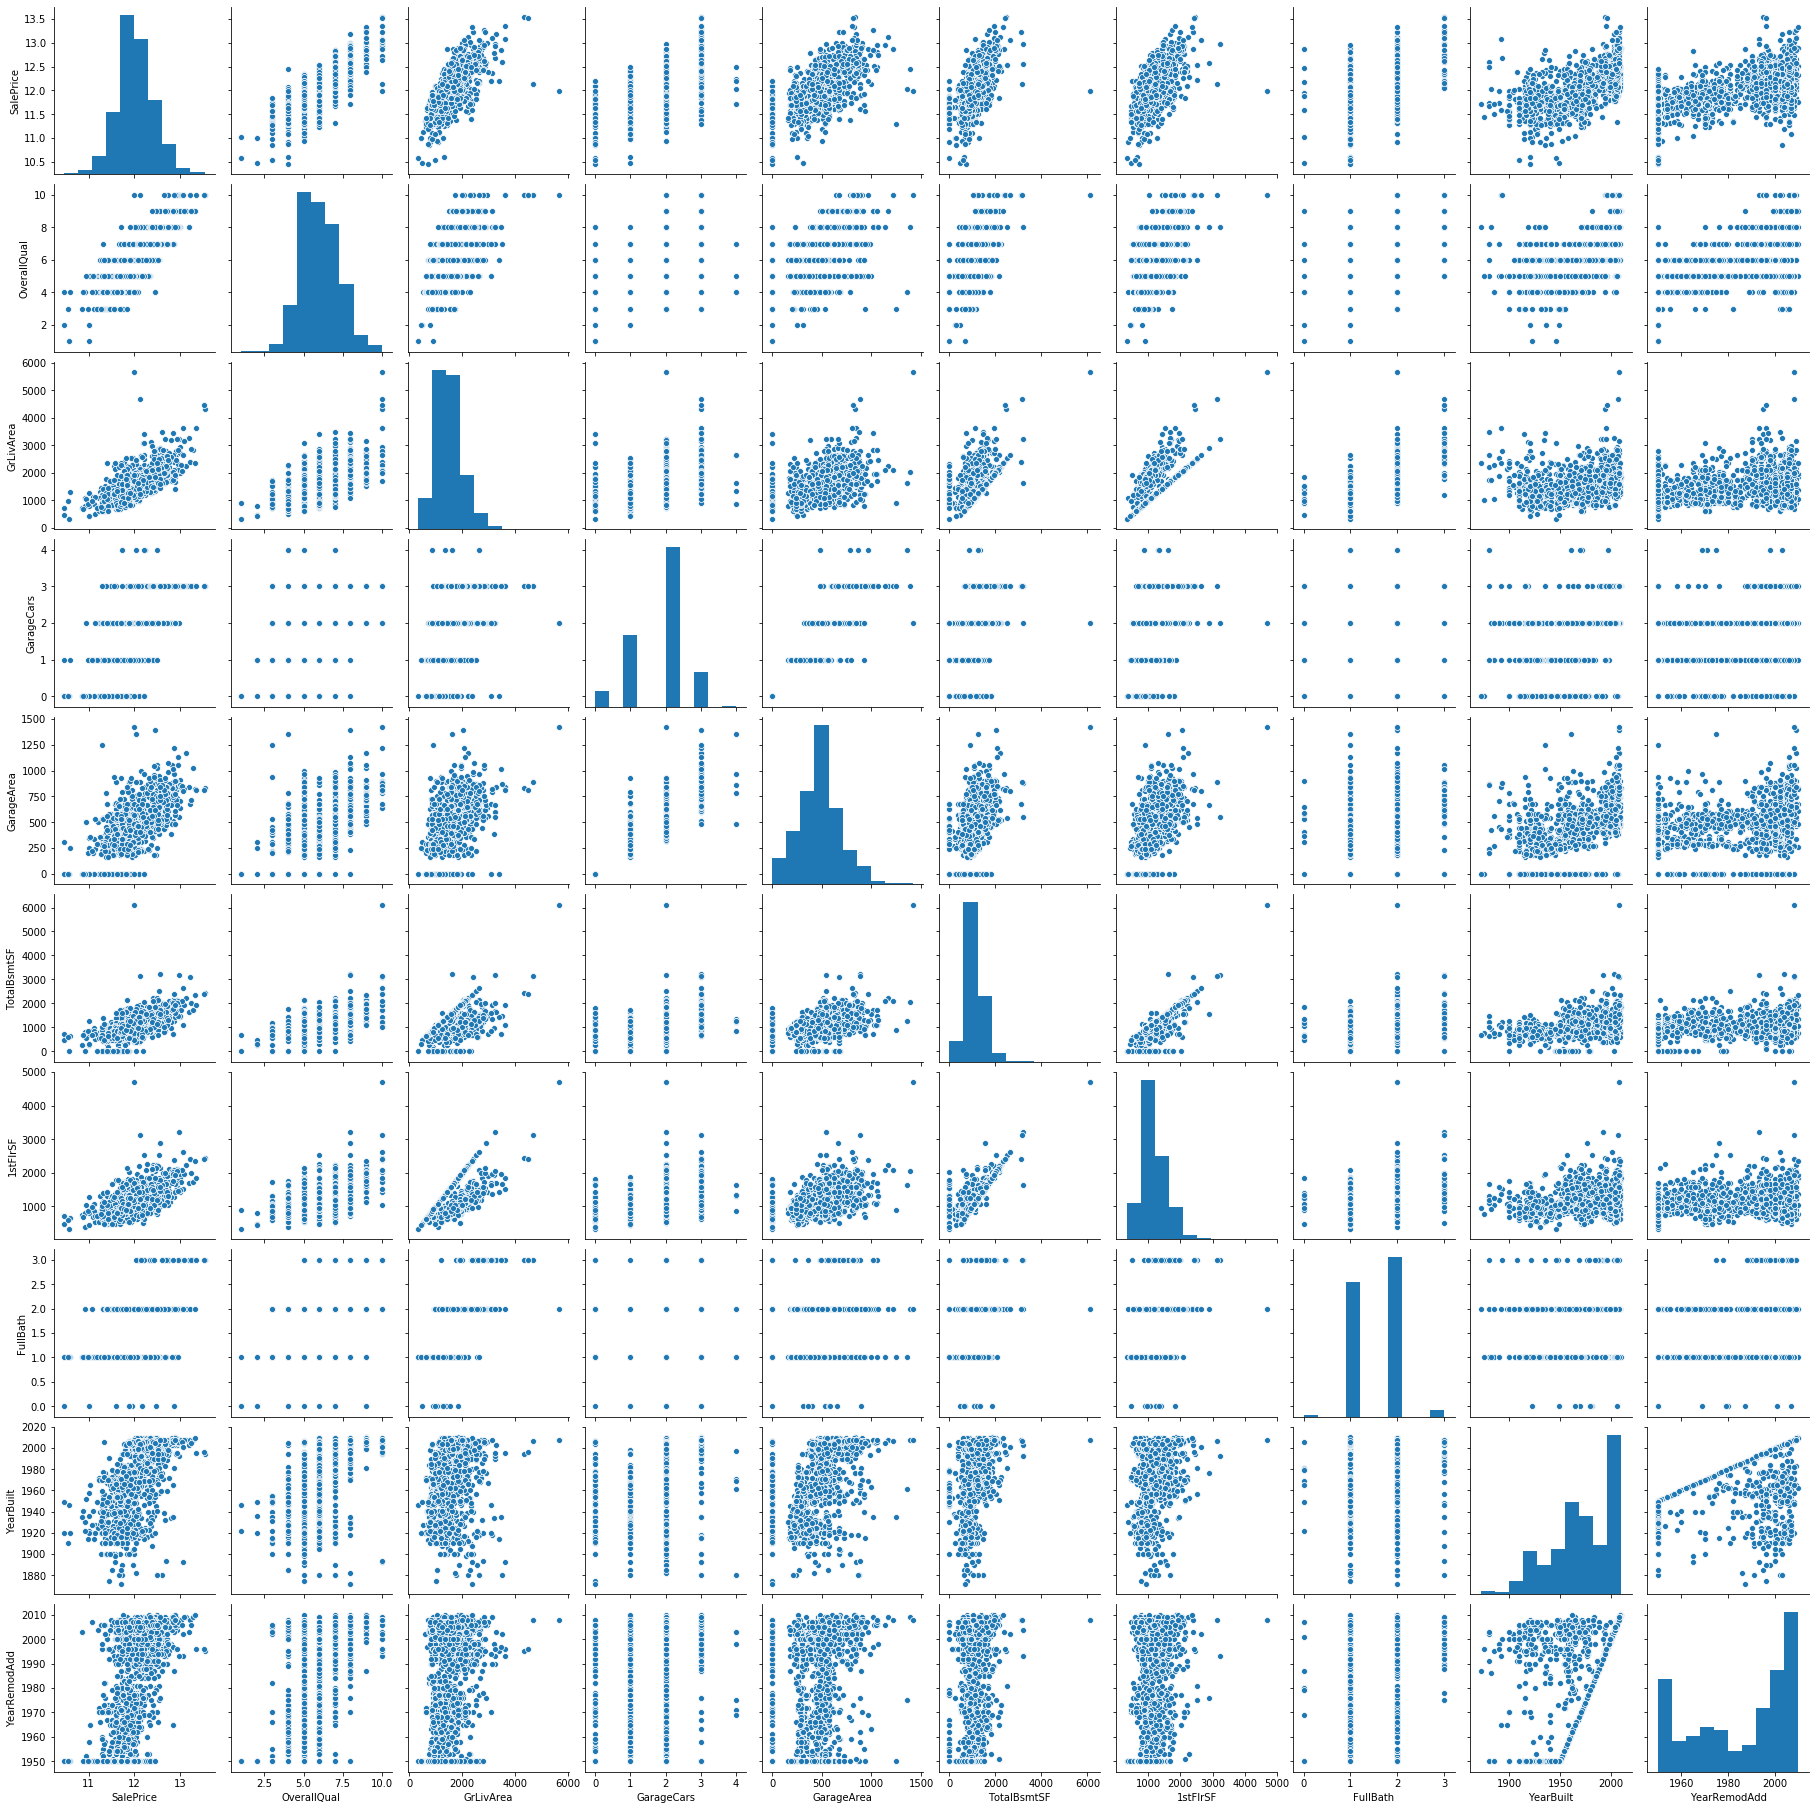

In [31]:
sns.pairplot(train[corr['SalePrice'].head(10).index])

In [6]:
#Drop Outliers
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<20000)].index, axis=0)
train.reset_index(drop=True, inplace=True)

In [7]:
trainrow=train.shape[0]
testrow=test.shape[0]
testids=test['Id'].copy()

In [14]:
X_train = data.iloc[:trainrow]
X_test = data.iloc[trainrow:]
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
categorical_features
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')